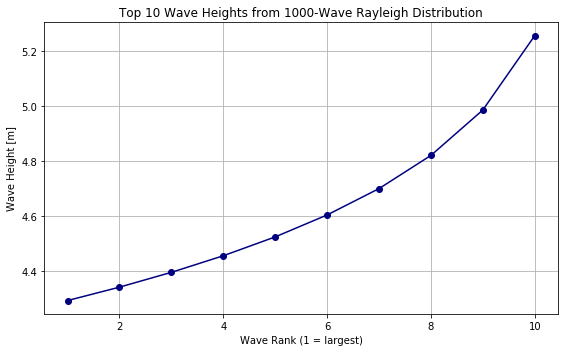

1 in 1000 wave: 5.26 m
2 in 1000 wave: 4.99 m
3 in 1000 wave: 4.82 m
4 in 1000 wave: 4.70 m
5 in 1000 wave: 4.60 m
6 in 1000 wave: 4.52 m
7 in 1000 wave: 4.46 m
8 in 1000 wave: 4.39 m
9 in 1000 wave: 4.34 m
10 in 1000 wave: 4.29 m


In [10]:
import numpy as np
import matplotlib.pyplot as plt


# Force white background
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Parameters
Hs = 2.0  # Significant wave height [m]
N = 1000  # Total number of waves
n_peaks = 10  # Number of top waves

# Rayleigh scale parameter
sigma = Hs / np.sqrt(2)

# Use exceedance probabilities for the top 10 waves
exceed_probs = np.arange(n_peaks, 0, -1) / N  # 10/1000, 9/1000, ..., 1/1000
H_extreme = sigma * np.sqrt(-2 * np.log(exceed_probs))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, n_peaks + 1), H_extreme, 'o-', color='navy')
plt.xlabel('Wave Rank (1 = largest)')
plt.ylabel('Wave Height [m]')
plt.title('Top 10 Wave Heights from 1000-Wave Rayleigh Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print results
for i, h in enumerate(H_extreme[::-1], 1):
    print(f"{i} in 1000 wave: {h:.2f} m")


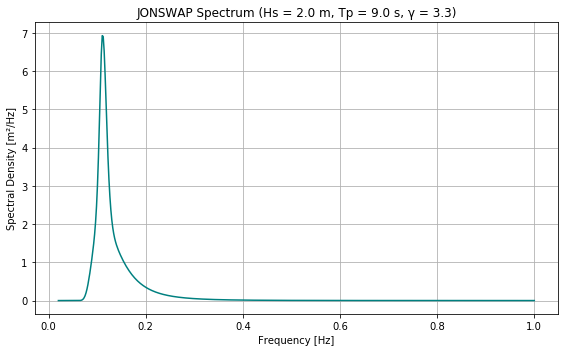

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Hs = 2.0       # Significant wave height [m]
Tp = 9.0       # Peak period [s]
gamma = 3.3    # Peak enhancement factor
g = 9.81       # Gravity [m/s²]

# Frequency array
f = np.linspace(0.02, 1.0, 500)  # Hz

# Calculate spectral peak frequency
fp = 1.0 / Tp

# JONSWAP shape
sigma = np.where(f <= fp, 0.07, 0.09)
r = np.exp(- (f - fp)**2 / (2 * sigma**2 * fp**2))

# Pierson-Moskowitz base spectrum (α will be scaled from Hs)
alpha_PM = 0.0081
S_PM = alpha_PM * g**2 / ((2 * np.pi)**4 * f**5) * np.exp(-1.25 * (fp / f)**4)

# JONSWAP spectrum
S = S_PM * gamma**r

# Normalize to correct Hs (area under S(f) must equal Hs² / 16)
df = f[1] - f[0]
m0 = np.sum(S) * df
scaling = (Hs**2 / 16) / m0
S *= scaling

# Plot JONSWAP spectrum
plt.figure(figsize=(8, 5))
plt.plot(f, S, color='teal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Spectral Density [m²/Hz]')
plt.title(f'JONSWAP Spectrum (Hs = {Hs} m, Tp = {Tp} s, γ = {gamma})')
plt.grid(True)
plt.tight_layout()
plt.show()
